# **Data Analytics Final Portfolio Project: NHL Game Data**

# Table of Contents

* [Introduction](#introduction)
* [Scoping](#scoping)
    * [Project Goals](#goals)
    * [Data](#data)
    * [Exploratory Data Analysis](#analysis)
    * [Conclusions](#conclusions1)
* [Import of modules](#import_modules)
* [Data](#Data)
    * [Loading the Data](#loading_data)
    * [Data Characteristics](#data_characteristics)
* [Data Cleaning](#cleaning)
    * [Removal of Duplicates](#duplicates)
    * [Adressing Missing Values](#nans)
        * [game_teams_stats_df](#game_teams_stats_df)
        * [game_df](#game_df)
        * [player_info_df](#player_info_df)
        * [skater_stats_df](#skater_stats_df)
        * [goalie_stats_df](#goalie_stats_df)
* [Exploratory Data Analysis](#explore)    
    * [General questions](#general_questions)
        * [Has the average number of goals per game increased over time?](#q1-1)
        * [Has the average number of shots per game increased over time?](#q1-2)
        * [What is the goalie save percentage dynamic?](#q1-3)
    * [Specific questions](#specific_questions)
    * [A. Defensive Stats](#defensive)
        * [Is larger number of hits good predictor for game winner?](#q2-1)  
        * [How does the goalie power play save percentage effect the game outcome?](#q2-2) 
        * [How do blocks effect the game outcome?](#q2-3) 
        * [How does takeaways and giveaways effect the game outcome?](#q2-4) 
    * [B. Offensive Stats](#offensive)
        * [How does power play percentage effect the game outcome?](#q3-1)  
        * [Is larger number of shots per game good predictor for game winner?](#q3-2) 
    * [C. General Stats](#general_stats)
        * [Is the larger number of penalty minutes good predictor for game loser?](#q4-1)  
    * [D. Advanced](#advanced)
        * [Do phisical abilities of players like average team age or average height and/or weight effect the performance of a team?](#q5-1)
* [Additional Analysis](#add)          
* [Conclusions](#conclusions2)
* [Further Research](#going_further)

# Introduction <a class="anchor" id="introduction"></a>

This goal of this project is to analyze NHL game data from NHL.com, particularly about key statistics such as goals, shots, save percentage etc.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

**General**
1. Has the average number of goals per game increased over time?
1. Has the average number of shots per game(1) increased over time?
1. What is the goalie save percentage dynamic?

**Specific**
**A. Defensive Stats**
1. Is larger number of hits good predictor for game winner?
1. How does the goalie power play save percentage effect the game outcome?
1. How do blocks effect the game outcome?
1. How does takeaways and giveaways effect the game outcome?

**B. Offensive Stats**
1. How does power play percentage effect the game outcome?
1. Is larger number of shots per game good predictor for game winner?

**C. General Stats**
1. Is the larger number of penalty minutes good predictor for game loser?

**D. Advanced**
1. Do physical abilities of players like average team age or average height effect the performance of a team?

(1) Hereinafter refered to as shots.

**Data sources:**

All datasets were provided by [Martin Ellis](https://www.kaggle.com/datasets/martinellis/nhl-game-data?resource=download).

Information regarding the features for the data are located in the Column section on the website.

# Scoping <a class="anchor" id="scoping"></a>

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

## Project Goals <a class="anchor" id="goals"></a>

In this project the perspective will be through a key game statistics of the National Hockey League.  The Constitution of the National Hockey League states that the purpose of the NHL is to “perpetuate hockey as one of the national games of the United States and Canada” . For me, statistical analysis increases the enjoyment of hockey and the main objectives as an analyst will be understanding of how some features of game affect the success of teams en bloc and the outcome of a a game in partcilular.

## Data <a class="anchor" id="data"></a>

The data for this project was downloaded from Kaggle:
https://www.kaggle.com/datasets/martinellis/nhl-game-data?resource=download

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

## Exploratory Data Analysis <a class="anchor" id="analysis"></a>

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. 

## Conclusions <a class="anchor" id="conclusions1"></a>

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

# Import Python Modules <a class="anchor" id="import_modules"></a>

First, import the primary modules that will be used in this project:

In [140]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Data <a class="anchor" id="Data"></a>

## Loading the Data <a class="anchor" id="loading_data"></a>

To analyze the key statistics of NHL games, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `game.csv`,  `game_teams_stats.csv`, `player_info.csv`, `game_goalie_stats.csv`, `team_info.csv` and `game_skater_stats.csv` are read in as `DataFrames` called `game_df`, `game_teams_stats_df`, `player_info_df`,`goalie_stats_df`, `team_info_df` and `skater_stats_df` respectively. The newly created `DataFrames` are glimpsed with `.head()` and `.info()` to check its contents.

In [141]:
game_df = pd.read_csv('datasets\game.csv')
game_df.season.unique()

array([20162017, 20172018, 20152016, 20142015, 20132014, 20122013,
       20112012, 20102011, 20092010, 20082009, 20072008, 20062007,
       20022003, 20032004, 20052006, 20002001, 20012002, 20192020,
       20182019], dtype=int64)

In [142]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 26305 non-null  int64 
 1   season                  26305 non-null  int64 
 2   type                    26305 non-null  object
 3   date_time_GMT           26305 non-null  object
 4   away_team_id            26305 non-null  int64 
 5   home_team_id            26305 non-null  int64 
 6   away_goals              26305 non-null  int64 
 7   home_goals              26305 non-null  int64 
 8   outcome                 26305 non-null  object
 9   home_rink_side_start    25109 non-null  object
 10  venue                   26305 non-null  object
 11  venue_link              26305 non-null  object
 12  venue_time_zone_id      26305 non-null  object
 13  venue_time_zone_offset  26305 non-null  int64 
 14  venue_time_zone_tz      26305 non-null  object
dtypes:

In [143]:
game_df.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


In [144]:
game_teams_stats_df = pd.read_csv('datasets\game_teams_stats.csv')
game_teams_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

In [145]:
game_teams_stats_df.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [146]:
player_info_df = pd.read_csv('datasets\player_info.csv')
player_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_id           3925 non-null   int64  
 1   firstName           3925 non-null   object 
 2   lastName            3925 non-null   object 
 3   nationality         3917 non-null   object 
 4   birthCity           3920 non-null   object 
 5   primaryPosition     3925 non-null   object 
 6   birthDate           3925 non-null   object 
 7   birthStateProvince  2802 non-null   object 
 8   height              3922 non-null   object 
 9   height_cm           3922 non-null   float64
 10  weight              3922 non-null   float64
 11  shootsCatches       3908 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 368.1+ KB


In [147]:
player_info_df.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R


In [148]:
goalie_stats_df = pd.read_csv('datasets\game_goalie_stats.csv')
goalie_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56656 entries, 0 to 56655
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   game_id                     56656 non-null  int64  
 1   player_id                   56656 non-null  int64  
 2   team_id                     56656 non-null  int64  
 3   timeOnIce                   56656 non-null  int64  
 4   assists                     56656 non-null  int64  
 5   goals                       56656 non-null  int64  
 6   pim                         56656 non-null  int64  
 7   shots                       56656 non-null  int64  
 8   saves                       56656 non-null  int64  
 9   powerPlaySaves              56656 non-null  int64  
 10  shortHandedSaves            56656 non-null  int64  
 11  evenSaves                   56656 non-null  int64  
 12  shortHandedShotsAgainst     56656 non-null  int64  
 13  evenShotsAgainst            566

In [149]:
goalie_stats_df.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,NaN,75.000000,33.333333,84.615385
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889


In [150]:
skater_stats_df = pd.read_csv('datasets\game_skater_stats.csv')
skater_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945830 entries, 0 to 945829
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_id               945830 non-null  int64  
 1   player_id             945830 non-null  int64  
 2   team_id               945830 non-null  int64  
 3   timeOnIce             945830 non-null  int64  
 4   assists               945830 non-null  int64  
 5   goals                 945830 non-null  int64  
 6   shots                 945830 non-null  int64  
 7   hits                  547723 non-null  float64
 8   powerPlayGoals        945830 non-null  int64  
 9   powerPlayAssists      945830 non-null  int64  
 10  penaltyMinutes        945830 non-null  int64  
 11  faceOffWins           945830 non-null  int64  
 12  faceoffTaken          945830 non-null  int64  
 13  takeaways             547723 non-null  float64
 14  giveaways             547723 non-null  float64
 15  

In [151]:
skater_stats_df.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2016020045,8468513,4,955,1,0,0,2.0,0,0,...,0,1.0,1.0,0,0,1.0,1,858,97,0
1,2016020045,8476906,4,1396,1,0,4,2.0,0,0,...,0,1.0,2.0,0,0,2.0,0,1177,0,219
2,2016020045,8474668,4,915,0,0,1,1.0,0,0,...,0,2.0,0.0,0,0,0.0,-1,805,0,110
3,2016020045,8473512,4,1367,3,0,0,0.0,0,2,...,27,0.0,0.0,0,0,0.0,-1,1083,19,265
4,2016020045,8471762,4,676,0,0,3,2.0,0,0,...,0,0.0,1.0,0,0,0.0,-1,613,63,0


In [152]:
team_info_df = pd.read_csv('datasets/team_info.csv')
team_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_id       33 non-null     int64 
 1   franchiseId   33 non-null     int64 
 2   shortName     33 non-null     object
 3   teamName      33 non-null     object
 4   abbreviation  33 non-null     object
 5   link          33 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.7+ KB


In [153]:
team_info_df.head()

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6


## Data Characteristics <a class="anchor" id="data_characteristics"></a>

Next, there will be a check for the dimensions of the datasets, the smallest `team info shape` contains 33 rows and 6 columns while `skater_stats_df` has 945,830 rows and 12 columns.

In [154]:
print(f"game shape: {game_df.shape}")
print(f"game teams stats shape: {game_teams_stats_df.shape}")
print(f"player info shape: {player_info_df.shape}")
print(f"goalie stats shape: {goalie_stats_df.shape}")
print(f"skater stats shape: {skater_stats_df.shape}")
print(f"team info shape: {team_info_df.shape}")

game shape: (26305, 15)
game teams stats shape: (52610, 17)
player info shape: (3925, 12)
goalie stats shape: (56656, 19)
skater stats shape: (945830, 22)
team info shape: (33, 6)


#  Data Cleaning <a class="anchor" id="cleaning"></a>

## Removal of Duplicates <a class="anchor" id="duplicates"></a>

In [155]:
# Check the number of duplicates for goalie_stats_df
len(goalie_stats_df)-len(goalie_stats_df.drop_duplicates())

5493

In [156]:
# 5493 out of 56656 are duplicates. Let's remove them from df:
goalie_stats_df = goalie_stats_df.drop_duplicates()
goalie_stats_df.shape

(51163, 19)

In [157]:
# The same operations we repeat for all datasets
len(game_df)-len(game_df.drop_duplicates())

2570

In [158]:
game_df = game_df.drop_duplicates()
game_df.shape

(23735, 15)

In [159]:
len(game_teams_stats_df)-len(game_teams_stats_df.drop_duplicates())

5140

In [160]:
game_teams_stats_df = game_teams_stats_df.drop_duplicates()
game_teams_stats_df.shape

(47470, 17)

In [161]:
len(player_info_df)-len(player_info_df.drop_duplicates()) 

0

In [162]:
len(skater_stats_df)-len(skater_stats_df.drop_duplicates())  

92426

In [163]:
skater_stats_df = skater_stats_df.drop_duplicates()
skater_stats_df.shape

(853404, 22)

In [164]:
len(team_info_df)-len(team_info_df.drop_duplicates())

0

## Adressing Missing Values <a class="anchor" id="nans"></a>

### game_teams_stats_df  <a class="anchor" id="game_teams_stats_df"></a>

In [165]:
# first let's check the number of missin values
game_teams_stats_df.isnull().sum()

game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                   28
goals                         8
shots                         8
hits                       4928
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
giveaways                  4928
takeaways                  4928
blocked                    4928
startRinkSide              2198
dtype: int64

Our point of interest is the following statistic: won, goals, shots, hits, pim, powerPlayOpportunities, powerPlayGoals, giveaways, takeaways and blocked.

As regards **goals, shots, pim, powerPlayOpportunities and powerPlayGoals** the number of missing values is low we can simply **delete** those rows.

In [166]:
game_teams_stats_df.dropna(subset=['goals', 'shots', 'pim', 'powerPlayOpportunities', 'powerPlayGoals'], inplace=True)
game_teams_stats_df.isnull().sum()

game_id                       0
team_id                       0
HoA                           0
won                           0
settled_in                    0
head_coach                   20
goals                         0
shots                         0
hits                       4920
pim                           0
powerPlayOpportunities        0
powerPlayGoals                0
faceOffWinPercentage      22140
giveaways                  4920
takeaways                  4920
blocked                    4920
startRinkSide              2190
dtype: int64

As regards **hits, giveaways, takeaways and blocked** roughly 10% of data is missing which is pretty much. As far as these data is missing at random (MAR) we will use **multiple imputation approach** to fill in the gaps.

In [167]:
# Iterative Imputation
# import necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# create a datasets 
df_init = game_teams_stats_df[['game_id', 'team_id', 'won', 'goals', 'shots', 'hits',  'pim', 'powerPlayOpportunities', 'powerPlayGoals', 'giveaways', 'takeaways', 'blocked']]
df_test = df_init.sample(frac = 0.1)
# perform imputation
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_test)
game_teams_stats_df_cleaned = pd.DataFrame(np.round(imp.transform(df_init),1), columns=['game_id', 'team_id', 'won', 'goals', 'shots', 'hits',  'pim', 'powerPlayOpportunities', 'powerPlayGoals', 'giveaways', 'takeaways', 'blocked'])
game_teams_stats_df_cleaned.head(10)

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked
0,2.016020e+09,4.0,0.0,4.0,27.0,30.0,6.0,4.0,2.0,12.0,9.0,11.0
1,2.016020e+09,16.0,1.0,7.0,28.0,20.0,8.0,3.0,2.0,16.0,8.0,9.0
2,2.017021e+09,24.0,1.0,4.0,34.0,16.0,6.0,3.0,1.0,7.0,4.0,14.0
3,2.017021e+09,7.0,0.0,3.0,33.0,17.0,8.0,2.0,1.0,5.0,6.0,14.0
4,2.015020e+09,21.0,1.0,4.0,29.0,17.0,9.0,3.0,1.0,13.0,5.0,20.0
5,2.015020e+09,52.0,0.0,1.0,21.0,22.0,11.0,2.0,0.0,13.0,7.0,9.0
6,2.015021e+09,52.0,0.0,1.0,21.0,21.0,10.0,4.0,0.0,4.0,14.0,16.0
7,2.015021e+09,12.0,1.0,2.0,29.0,16.0,8.0,5.0,2.0,12.0,11.0,13.0
8,2.017021e+09,20.0,0.0,1.0,23.0,20.0,19.0,3.0,0.0,10.0,4.0,7.0
9,2.017021e+09,24.0,1.0,2.0,41.0,15.0,13.0,6.0,1.0,13.0,4.0,21.0


In [168]:
game_teams_stats_df_cleaned['game_id'] = game_teams_stats_df_cleaned['game_id'].astype(int)

In [169]:
game_teams_stats_df_cleaned.isnull().sum()

game_id                   0
team_id                   0
won                       0
goals                     0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
giveaways                 0
takeaways                 0
blocked                   0
dtype: int64

### game_df  <a class="anchor" id="game_df"></a>

In [170]:
game_df.isnull().sum()

game_id                      0
season                       0
type                         0
date_time_GMT                0
away_team_id                 0
home_team_id                 0
away_goals                   0
home_goals                   0
outcome                      0
home_rink_side_start      1099
venue                        0
venue_link                   0
venue_time_zone_id           0
venue_time_zone_offset       0
venue_time_zone_tz           0
dtype: int64

There is no interesting statistic with missing values, so nothing to do here.

### player_info_df  <a class="anchor" id="player_info_df"></a> 

In [171]:
player_info_df.isnull().sum()

player_id                0
firstName                0
lastName                 0
nationality              8
birthCity                5
primaryPosition          0
birthDate                0
birthStateProvince    1123
height                   3
height_cm                3
weight                   3
shootsCatches           17
dtype: int64

There is no interesting statistic with missing values, so nothing to do here.

### skater_stats_df  <a class="anchor" id="skater_stats_df"></a> 

In [172]:
skater_stats_df.isnull().sum()

game_id                      0
player_id                    0
team_id                      0
timeOnIce                    0
assists                      0
goals                        0
shots                        0
hits                    398107
powerPlayGoals               0
powerPlayAssists             0
penaltyMinutes               0
faceOffWins                  0
faceoffTaken                 0
takeaways               398107
giveaways               398107
shortHandedGoals             0
shortHandedAssists           0
blocked                 398107
plusMinus                    0
evenTimeOnIce                0
shortHandedTimeOnIce         0
powerPlayTimeOnIce           0
dtype: int64

In [173]:
skater_stats_df[skater_stats_df['hits'].isnull()].head(20)

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
337312,2009021012,8468434,19,988,2,1,3,NaN,0,2,...,8,NaN,NaN,0,0,NaN,1,693,64,231
337313,2009021012,8469508,19,1130,1,0,0,NaN,0,0,...,22,NaN,NaN,0,1,NaN,0,808,322,0
337314,2009021012,8470647,19,672,0,1,2,NaN,0,0,...,5,NaN,NaN,1,0,NaN,1,462,210,0
337315,2009021012,8468478,19,1003,0,0,0,NaN,0,0,...,0,NaN,NaN,0,0,NaN,0,655,348,0
337316,2009021012,8466142,19,1416,0,0,1,NaN,0,0,...,0,NaN,NaN,0,0,NaN,0,1084,332,0
337317,2009021012,8467890,19,1221,0,0,3,NaN,0,0,...,0,NaN,NaN,0,0,NaN,1,971,233,17
337318,2009021012,8473446,19,1227,0,0,3,NaN,0,0,...,0,NaN,NaN,0,0,NaN,1,1057,47,123
337319,2009021012,8473534,19,927,0,0,3,NaN,0,0,...,9,NaN,NaN,0,0,NaN,1,727,22,178
337320,2009021012,8470655,19,1083,0,1,4,NaN,0,0,...,22,NaN,NaN,0,0,NaN,1,713,273,97
337321,2009021012,8470257,19,985,1,1,3,NaN,1,1,...,0,NaN,NaN,0,0,NaN,0,766,5,214


In [174]:
skater_stats_df.dropna(subset=['hits', 'takeaways', 'giveaways', 'blocked'], inplace=True)

In [175]:
skater_stats_df.head(10)

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2016020045,8468513,4,955,1,0,0,2.0,0,0,...,0,1.0,1.0,0,0,1.0,1,858,97,0
1,2016020045,8476906,4,1396,1,0,4,2.0,0,0,...,0,1.0,2.0,0,0,2.0,0,1177,0,219
2,2016020045,8474668,4,915,0,0,1,1.0,0,0,...,0,2.0,0.0,0,0,0.0,-1,805,0,110
3,2016020045,8473512,4,1367,3,0,0,0.0,0,2,...,27,0.0,0.0,0,0,0.0,-1,1083,19,265
4,2016020045,8471762,4,676,0,0,3,2.0,0,0,...,0,0.0,1.0,0,0,0.0,-1,613,63,0
5,2016020045,8478439,4,1008,1,0,2,0.0,0,0,...,0,1.0,0.0,0,0,0.0,-1,911,0,97
6,2016020045,8479648,4,630,0,0,0,2.0,0,0,...,0,0.0,0.0,0,0,0.0,-1,630,0,0
7,2016020045,8470159,4,409,0,0,0,0.0,0,0,...,7,1.0,0.0,0,0,0.0,-1,360,49,0
8,2016020045,8478500,4,1275,0,0,0,1.0,0,0,...,0,0.0,1.0,0,0,0.0,-5,1015,139,121
9,2016020045,8475430,4,1029,0,0,1,5.0,0,0,...,0,0.0,1.0,0,0,1.0,1,988,41,0


Let's keep in our dataset only players with significant number of games in NHL. Let's define the 50-th quantile.

In [176]:
summary = skater_stats_df.groupby('player_id').count().reset_index()
summary = summary[['player_id', 'game_id']]
summary.columns = ['player_id', 'num_games']
summary.describe()

,player_id,num_games
count,2.115000e+03,2115.000000
mean,8.474140e+06,215.270449
std,4.736462e+03,230.938822
min,8.446485e+06,1.000000
25%,8.471267e+06,24.000000
50%,8.475194e+06,122.000000
75%,8.477454e+06,348.000000
max,8.481813e+06,876.000000


For our dataset the value is 122.0

We filter out players with less than 122 games:

In [177]:
skater_stats_df = skater_stats_df.groupby(['player_id'], as_index=False).filter(lambda x: len(x) >= 122)
skater_stats_df.head(10)

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2016020045,8468513,4,955,1,0,0,2.0,0,0,...,0,1.0,1.0,0,0,1.0,1,858,97,0
1,2016020045,8476906,4,1396,1,0,4,2.0,0,0,...,0,1.0,2.0,0,0,2.0,0,1177,0,219
2,2016020045,8474668,4,915,0,0,1,1.0,0,0,...,0,2.0,0.0,0,0,0.0,-1,805,0,110
3,2016020045,8473512,4,1367,3,0,0,0.0,0,2,...,27,0.0,0.0,0,0,0.0,-1,1083,19,265
4,2016020045,8471762,4,676,0,0,3,2.0,0,0,...,0,0.0,1.0,0,0,0.0,-1,613,63,0
5,2016020045,8478439,4,1008,1,0,2,0.0,0,0,...,0,1.0,0.0,0,0,0.0,-1,911,0,97
7,2016020045,8470159,4,409,0,0,0,0.0,0,0,...,7,1.0,0.0,0,0,0.0,-1,360,49,0
8,2016020045,8478500,4,1275,0,0,0,1.0,0,0,...,0,0.0,1.0,0,0,0.0,-5,1015,139,121
9,2016020045,8475430,4,1029,0,0,1,5.0,0,0,...,0,0.0,1.0,0,0,1.0,1,988,41,0
10,2016020045,8477930,4,801,0,0,1,1.0,0,0,...,12,0.0,0.0,0,0,2.0,0,698,103,0


### goalie_stats_df  <a class="anchor" id="goalie_stats_df"></a>

In [187]:
# first let's check the number of missin values
goalie_stats_df.isnull().sum()

game_id                        0
player_id                      0
team_id                        0
timeOnIce                      0
assists                        0
goals                          0
pim                            0
shots                          0
saves                          0
powerPlaySaves                 0
shortHandedSaves               0
evenSaves                      0
shortHandedShotsAgainst        0
evenShotsAgainst               0
powerPlayShotsAgainst          0
decision                       0
savePercentage                 0
powerPlaySavePercentage        0
evenStrengthSavePercentage    50
dtype: int64

Our point of interest is the following statistic: powerPlayShotsAgainst, decision, savePercentage, powerPlaySaves and powerPlaySavePercentage

As regards savePercentage the number of missing values is low we can simply delete those rows.

In [179]:
goalie_stats_df.dropna(subset=['savePercentage'], inplace=True)

As regards decision and powerPlaySavePercentage there are many nan values in the dataset which is critical for our analysis. Let's adress it one by one. 

In [180]:
goalie_stats_df[goalie_stats_df['powerPlaySavePercentage'].isnull()].head(10)

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
39,2017021124,8474152,12,3600,0,0,0,30,23,0,1,22,1,29,0,L,76.666667,NaN,75.862069
44,2016020716,8476914,29,781,0,0,0,5,5,0,0,5,0,5,0,NaN,100.000000,NaN,100.000000
46,2016020716,8471306,2,3600,0,0,0,23,21,0,0,21,0,23,0,W,91.304348,NaN,91.304348
52,2015021066,8475361,6,3600,0,0,0,26,22,0,2,20,2,24,0,L,84.615385,NaN,83.333333
56,2017020482,8471239,1,3690,0,0,0,36,34,0,0,34,0,36,0,L,94.444444,NaN,94.444444
60,2015020687,8475195,22,3546,0,0,0,30,25,0,2,23,3,27,0,L,83.333333,NaN,85.185185
69,2015020562,8471403,20,3458,0,0,0,23,20,0,1,19,1,22,0,L,86.956522,NaN,86.363636
129,2016020602,8475852,17,2400,0,0,0,20,17,0,1,16,1,19,0,L,85.000000,NaN,84.210526
133,2017020020,8475215,7,1620,0,0,0,16,12,0,1,11,3,13,0,L,75.000000,NaN,84.615385
136,2015020227,8474889,28,210,0,0,0,3,1,0,0,1,0,3,0,NaN,33.333333,NaN,33.333333


From this table we see that there are no **powerPlayShotsAgainst** in these cases and that's why the **powerPlaySavePercentage** data is not available - no shots, no saves. But let's assume that in this case the defense was so good and didn't allow shots on goal, so let's set the save percentage to 100%. 

In [181]:
goalie_stats_df['powerPlaySavePercentage'].fillna(value=100.0, inplace=True)

As for the second issue the decision is NaN when there are more than two goalies in a game and in overwhelming number cases such team loses the game. Let's replace NaN values with 'L'

In [182]:
goalie_stats_df['decision'].fillna(value='L', inplace=True)

In [183]:
goalie_stats_df.isnull().sum()

game_id                        0
player_id                      0
team_id                        0
timeOnIce                      0
assists                        0
goals                          0
pim                            0
shots                          0
saves                          0
powerPlaySaves                 0
shortHandedSaves               0
evenSaves                      0
shortHandedShotsAgainst        0
evenShotsAgainst               0
powerPlayShotsAgainst          0
decision                       0
savePercentage                 0
powerPlaySavePercentage        0
evenStrengthSavePercentage    56
dtype: int64

For goalies we also keep only players with significant number of games

In [184]:
summary = goalie_stats_df.groupby('player_id').count().reset_index()
summary = summary[['player_id', 'game_id']]
summary.columns = ['player_id', 'num_games']
summary.describe()

,player_id,num_games
count,3.640000e+02,364.000000
mean,8.469554e+06,140.195055
std,8.089942e+03,198.730885
min,8.445275e+06,1.000000
25%,8.466152e+06,5.000000
50%,8.471228e+06,42.000000
75%,8.475813e+06,207.500000
max,8.480925e+06,1055.000000


In [185]:
goalie_stats_df = goalie_stats_df.groupby(['player_id'], as_index=False).filter(lambda x: len(x) >= 42)
goalie_stats_df.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,L,75.000000,33.333333,84.615385
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889


# Exploratory Data Analysis <a class="anchor" id="explore"></a>

## General questions <a class="anchor" id="general_questions"></a>

### 1. Has the average number of goals per game increased over time? <a class="anchor" id="q1-1"></a>

In [188]:
# Calculate total number of goals
game_df['total_goals'] = game_df.away_goals + game_df.home_goals
game_df.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,total_goals
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,11
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT,7
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT,5
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT,3
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT,3


In [189]:
# Calculate total number of goals per season. For analysis I use regular season games only.
goals = game_df[game_df['type']=='R'].groupby('season').sum()['total_goals'].reset_index()
goals

,season,total_goals
0,20002001,6782
1,20012002,6442
2,20022003,6530
3,20032004,6318
4,20052006,7588
5,20062007,7246
6,20072008,6847
7,20082009,7165
8,20092010,6987
9,20102011,6870


In [190]:
# Calculate total number of games per season
games = game_df[game_df['type']=='R'].groupby('season').nunique('game_id')['game_id'].reset_index()
games

,season,game_id
0,20002001,1230
1,20012002,1230
2,20022003,1230
3,20032004,1230
4,20052006,1230
5,20062007,1230
6,20072008,1230
7,20082009,1230
8,20092010,1230
9,20102011,1230


In [191]:
# Join two datasets
goal_df = goals.merge(games, how='inner', on='season')

In [192]:
# Give the meanigful names to columns
goal_df.columns = ['season', 'total_goals', 'total_games']

In [193]:
# Calculate the average number of goals per games in season
goal_df['avg_goals_per_game'] = goal_df['total_goals'] / goal_df['total_games']

In [194]:
# Let's view the resulting table
goal_df

,season,total_goals,total_games,avg_goals_per_game
0,20002001,6782,1230,5.513821
1,20012002,6442,1230,5.237398
2,20022003,6530,1230,5.308943
3,20032004,6318,1230,5.136585
4,20052006,7588,1230,6.169106
5,20062007,7246,1230,5.891057
6,20072008,6847,1230,5.566667
7,20082009,7165,1230,5.825203
8,20092010,6987,1230,5.680488
9,20102011,6870,1230,5.585366


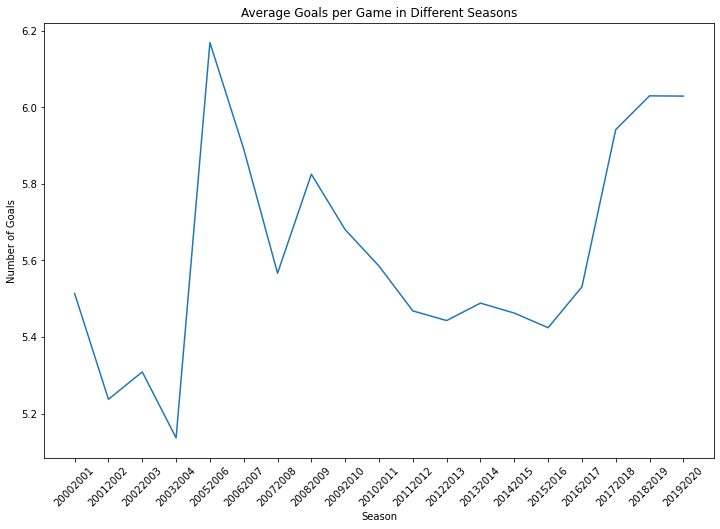

In [195]:
# and visualize it
plt.figure(figsize=(12,8))
ax = plt.subplot (1,1,1)
plt.plot(goal_df['season'].astype(str), goal_df['avg_goals_per_game'])
plt.title('Average Goals per Game in Different Seasons')
plt.xlabel('Season')
plt.xticks(rotation = 45)
plt.ylabel('Number of Goals')
plt.show()

**The average number of goals per game started to steadily increase since season 2016/2017.**

### 2. Has the average number of shots per game increased over time? <a class="anchor" id="q1-2"></a>

In [196]:
# Join two datasets
shots_df = game_teams_stats_df_cleaned.merge(game_df, how='left', on='game_id')

In [197]:
shots_df.head(6)

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,total_goals
0,2016020045,4.0,0.0,4.0,27.0,30.0,6.0,4.0,2.0,12.0,...,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,11
1,2016020045,16.0,1.0,7.0,28.0,20.0,8.0,3.0,2.0,16.0,...,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,11
2,2017020812,24.0,1.0,4.0,34.0,16.0,6.0,3.0,1.0,7.0,...,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT,7
3,2017020812,7.0,0.0,3.0,33.0,17.0,8.0,2.0,1.0,5.0,...,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT,7
4,2015020314,21.0,1.0,4.0,29.0,17.0,9.0,3.0,1.0,13.0,...,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT,5
5,2015020314,52.0,0.0,1.0,21.0,22.0,11.0,2.0,0.0,13.0,...,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT,5


In [198]:
# Create the dataset of total shots per season
shots = shots_df.groupby('season').sum('shots')['shots'].reset_index()
shots.columns = ['season', 'total_shots']
shots

,season,total_shots
0,20002001,68168.0
1,20012002,67855.0
2,20022003,69761.0
3,20032004,69010.0
4,20052006,73703.0
5,20062007,72778.0
6,20072008,71503.0
7,20082009,74310.0
8,20092010,74581.0
9,20102011,80497.0


In [199]:
# Merge goal_df with our shot statistic per season
goal_df = goal_df.merge(shots, how='left', on='season')
goal_df

,season,total_goals,total_games,avg_goals_per_game,total_shots
0,20002001,6782,1230,5.513821,68168.0
1,20012002,6442,1230,5.237398,67855.0
2,20022003,6530,1230,5.308943,69761.0
3,20032004,6318,1230,5.136585,69010.0
4,20052006,7588,1230,6.169106,73703.0
5,20062007,7246,1230,5.891057,72778.0
6,20072008,6847,1230,5.566667,71503.0
7,20082009,7165,1230,5.825203,74310.0
8,20092010,6987,1230,5.680488,74581.0
9,20102011,6870,1230,5.585366,80497.0


In [200]:
# Calculate the average number of shots per games in season
goal_df['avg_shots_per_game'] = goal_df['total_shots'] / goal_df['total_games']

In [201]:
# And resulting df is
goal_df

,season,total_goals,total_games,avg_goals_per_game,total_shots,avg_shots_per_game
0,20002001,6782,1230,5.513821,68168.0,55.421138
1,20012002,6442,1230,5.237398,67855.0,55.166667
2,20022003,6530,1230,5.308943,69761.0,56.716260
3,20032004,6318,1230,5.136585,69010.0,56.105691
4,20052006,7588,1230,6.169106,73703.0,59.921138
5,20062007,7246,1230,5.891057,72778.0,59.169106
6,20072008,6847,1230,5.566667,71503.0,58.132520
7,20082009,7165,1230,5.825203,74310.0,60.414634
8,20092010,6987,1230,5.680488,74581.0,60.634959
9,20102011,6870,1230,5.585366,80497.0,65.444715


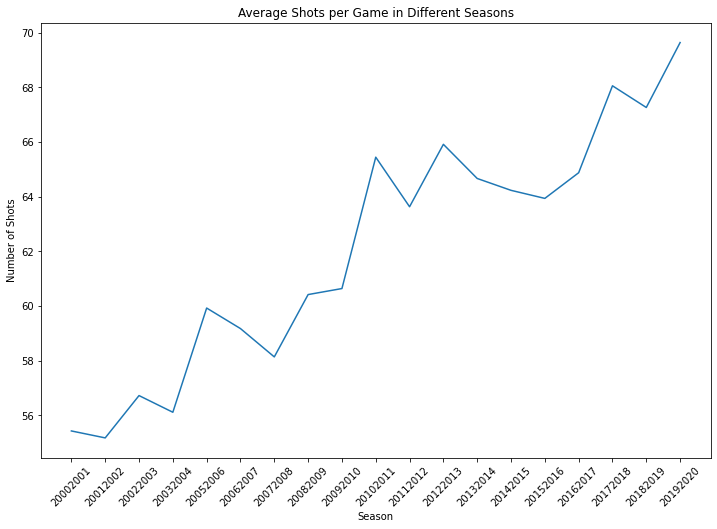

In [202]:
# and visualize it
plt.figure(figsize=(12,8))
ax = plt.subplot (1,1,1)
plt.plot(goal_df['season'].astype(str), goal_df['avg_shots_per_game'])
plt.title('Average Shots per Game in Different Seasons')
plt.xlabel('Season')
plt.xticks(rotation = 45)
plt.ylabel('Number of Shots')
plt.show()

**The average number of shots per game started to increase since season 2002/2003**

### 3. What is the goalie save percentage dynamic? <a class="anchor" id="q1-3"></a>

To answer this question we will use **goalie_stats_df**.

In [203]:
goalie_stats_df.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,L,75.000000,33.333333,84.615385
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889


In [204]:
# Join goalie_stats_df with game_df:
temp_df = goalie_stats_df.merge(game_df, how='left', on='game_id')

In [205]:
temp_df.head(10)

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,total_goals
0,2016020045,8473607,4,1504,0,0,0,16,12,1,...,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,11
1,2016020045,8473461,4,2011,0,0,0,11,9,1,...,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,11
2,2016020045,8470645,16,3598,0,0,0,27,23,2,...,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,11
3,2017020812,8468011,24,3696,0,0,0,33,30,1,...,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT,7
4,2017020812,8475215,7,3539,0,0,0,33,29,4,...,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT,7
5,2015020314,8473575,21,3600,0,0,0,21,20,3,...,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT,5
6,2015020314,8474636,52,3520,0,0,0,28,25,4,...,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT,5
7,2015020849,8471715,52,3475,0,0,0,29,27,8,...,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT,3
8,2015020849,8475663,12,3600,0,0,0,21,20,1,...,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT,3
9,2017020586,8469608,20,3458,1,0,0,41,39,8,...,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT,3


In [206]:
# Create the dataset of average save percentage per season
save_pct = temp_df.groupby('season')['savePercentage'].mean().reset_index()
save_pct.columns = ['season', 'avg_save_pct']

In [207]:
# Let's merge it with our common goal_df
goal_df = goal_df.merge(save_pct, how='left', on='season')
goal_df['season'] = goal_df['season'].astype(str)
goal_df

,season,total_goals,total_games,avg_goals_per_game,total_shots,avg_shots_per_game,avg_save_pct
0,20002001,6782,1230,5.513821,68168.0,55.421138,89.719885
1,20012002,6442,1230,5.237398,67855.0,55.166667,90.008079
2,20022003,6530,1230,5.308943,69761.0,56.716260,89.961028
3,20032004,6318,1230,5.136585,69010.0,56.105691,90.346337
4,20052006,7588,1230,6.169106,73703.0,59.921138,89.354746
5,20062007,7246,1230,5.891057,72778.0,59.169106,89.477545
6,20072008,6847,1230,5.566667,71503.0,58.132520,89.758181
7,20082009,7165,1230,5.825203,74310.0,60.414634,90.084486
8,20092010,6987,1230,5.680488,74581.0,60.634959,89.987824
9,20102011,6870,1230,5.585366,80497.0,65.444715,90.320987


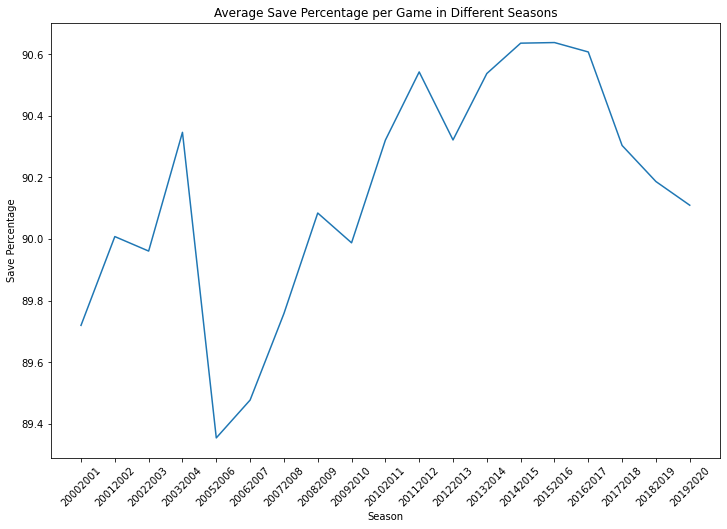

In [208]:
# and visualize it
plt.figure(figsize=(12,8))
ax = plt.subplot (1,1,1)
plt.plot(goal_df['season'].astype(str), goal_df['avg_save_pct'])
plt.title('Average Save Percentage per Game in Different Seasons')
plt.xlabel('Season')
plt.xticks(rotation = 45)
plt.ylabel('Save Percentage')
plt.show()

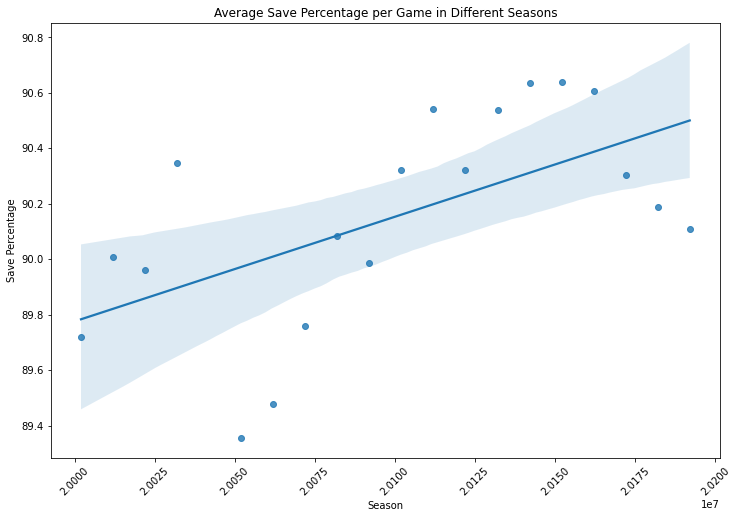

In [209]:
goal_df['season'] = goal_df['season'].astype(int)
plt.figure(figsize=(12,8))
ax = plt.subplot (1,1,1)
sns.regplot(data = goal_df, x = 'season', y = 'avg_save_pct')
plt.title('Average Save Percentage per Game in Different Seasons')
plt.xlabel('Season')
plt.xticks(rotation = 45)
plt.ylabel('Save Percentage')
plt.show()

**The average goalie save percentage per season increased from 89.7 in 2000/2001 season to 90.1 in 2019/2020 which is pretty much for such statistic.**

## Specific questions <a class="anchor" id="specific_questions"></a>

## A. Defensive Stats <a class="anchor" id="defensive"></a>

### 1. Is larger number of hits good predictor for game winner? <a class="anchor" id="q2-1"></a>

To answer this question we use **game_teams_stats_df_cleaned**, and in particular won and hits column.

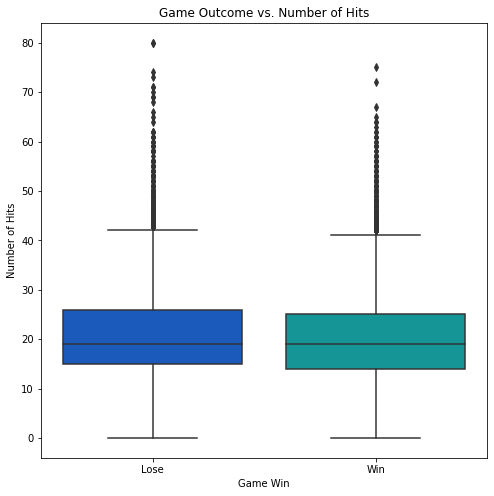

In [210]:
# Let's visualize it for better representaion of values. 
# We use boxplot as far as we compare categorical variable with quantative one
plt.figure(figsize=(8,8))
ax = plt.subplot (1,1,1)
sns.boxplot(data=game_teams_stats_df_cleaned, x='won', y='hits', palette = 'winter')
plt.title('Game Outcome vs. Number of Hits')
plt.xlabel('Game Win')
plt.ylabel('Number of Hits')
ax.set_xticklabels(['Lose', 'Win'])
plt.show()

**Larger number of hits is not a good predictor for game winner.**

### 2. How does the goalie power play save percentage effect the game outcome? <a class="anchor" id="q2-2"></a>

To answer this question we use **goalie_stats_df**. 

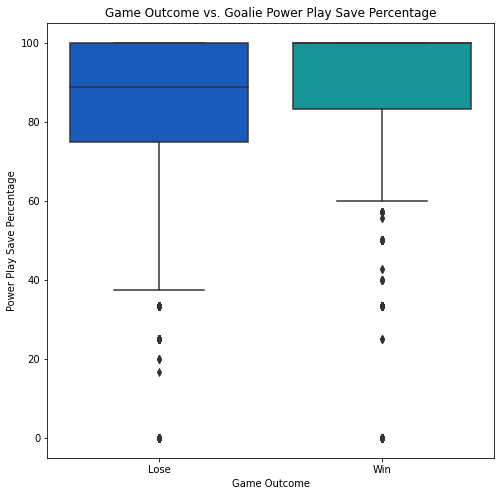

In [211]:
plt.figure(figsize=(8,8))
ax = plt.subplot (1,1,1)
sns.boxplot(data=goalie_stats_df, x='decision', y='powerPlaySavePercentage', palette = 'winter')
plt.title('Game Outcome vs. Goalie Power Play Save Percentage')
plt.xlabel('Game Outcome')
plt.ylabel('Power Play Save Percentage')
ax.set_xticklabels(['Lose', 'Win'])
plt.show()

**Expectedly higher goalie power play save percentage increases the chances of a team to win a game.**

### 3. How do blocks effect the game outcome? <a class="anchor" id="q2-3"></a>

To answer this question we use **game_teams_stats_df_cleaned**, and in particular won and blocked column.

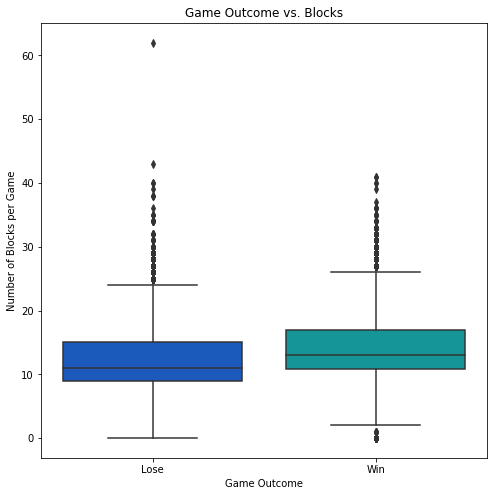

In [212]:
plt.figure(figsize=(8,8))
ax = plt.subplot (1,1,1)
sns.boxplot(data=game_teams_stats_df_cleaned, x='won', y='blocked', palette = 'winter')
plt.title('Game Outcome vs. Blocks')
plt.xlabel('Game Outcome')
plt.ylabel('Number of Blocks per Game')
ax.set_xticklabels(['Lose', 'Win'])
plt.show()

**Larger number of blocks per game increases the chances of a team to win a game.**

### 4. How does takeaways and giveaways effect the game outcome? <a class="anchor" id="q2-4"></a>

To answer this question we use **game_teams_stats_df_cleaned**, and in particular won, takeaways and giveaways columns.

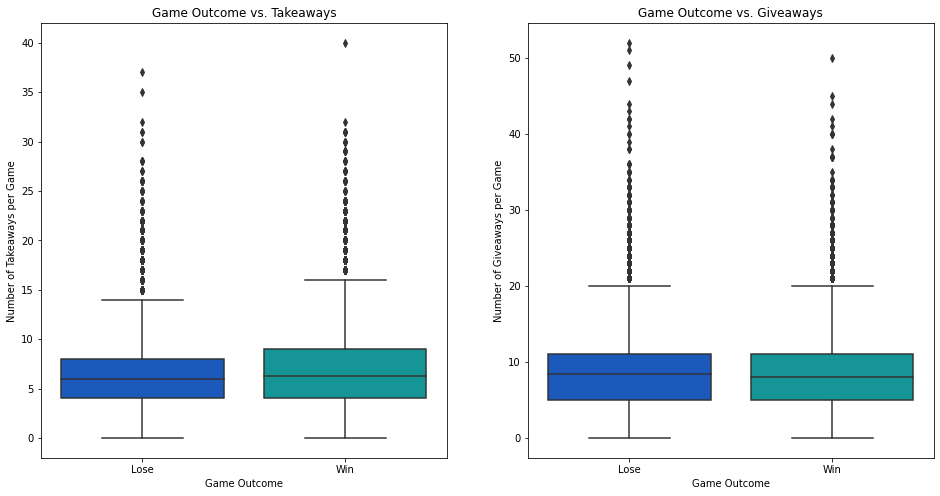

In [213]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot (1,2,1)
sns.boxplot(data=game_teams_stats_df_cleaned, x='won', y='takeaways', palette = 'winter')
plt.title('Game Outcome vs. Takeaways')
plt.xlabel('Game Outcome')
plt.ylabel('Number of Takeaways per Game')
ax1.set_xticklabels(['Lose', 'Win'])
ax2 = plt.subplot (1,2,2)
sns.boxplot(data=game_teams_stats_df_cleaned, x='won', y='giveaways', palette = 'winter')
plt.title('Game Outcome vs. Giveaways')
plt.xlabel('Game Outcome')
plt.ylabel('Number of Giveaways per Game')
ax2.set_xticklabels(['Lose', 'Win'])
plt.show()

**Takeaways slightly increase the chances of a team to win a game whereas giveaways doesn't have any effect.**

## B. Offensive Stats <a class="anchor" id="offensive"></a>

### 1. How does power play pepcenatge effect the game outcome? <a class="anchor" id="q3-1"></a>

To answer this question we use **game_teams_stats_df_cleaned**, and in particular won and power_play_percentage columns.

In [214]:
game_teams_stats_df_cleaned['power_play_percentage'] = (game_teams_stats_df_cleaned['powerPlayGoals'] / game_teams_stats_df_cleaned['powerPlayOpportunities']) * 100

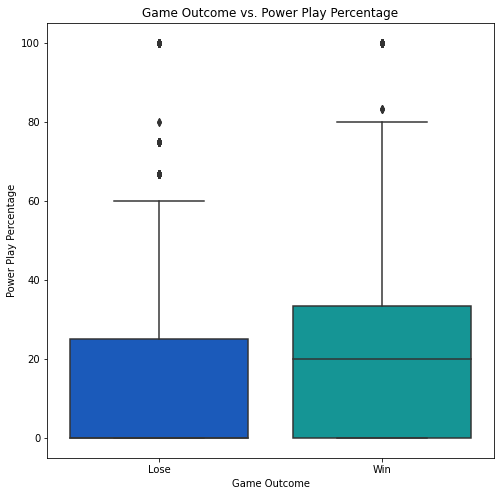

In [215]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot (1,1,1)
sns.boxplot(data=game_teams_stats_df_cleaned, x='won', y='power_play_percentage', palette = 'winter')
plt.title('Game Outcome vs. Power Play Percentage')
plt.xlabel('Game Outcome')
plt.ylabel('Power Play Percentage')
ax1.set_xticklabels(['Lose', 'Win'])
plt.show()

**If a team doesn't convert power play opportunities to goals most likely a team loses.**

### 2. Is larger number of shots per game good predictor for game winner? <a class="anchor" id="q3-2"></a>

To answer this question we use goalie_stats_df.

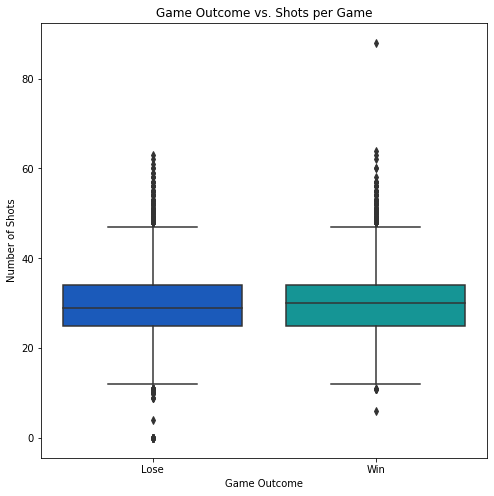

In [216]:
# Finally we can visualize the data
plt.figure(figsize=(8,8))
ax1 = plt.subplot (1,1,1)
sns.boxplot(data=game_teams_stats_df_cleaned, x='won', y='shots', palette = 'winter')
plt.title('Game Outcome vs. Shots per Game')
plt.xlabel('Game Outcome')
plt.ylabel('Number of Shots')
ax1.set_xticklabels(['Lose', 'Win'])
plt.show()

In [217]:
# Let's remove outliers and visualize again
q_low = game_teams_stats_df_cleaned['shots'].quantile(0.05)
q_hi  = game_teams_stats_df_cleaned['shots'].quantile(0.95)
shots_game_df_filtered = game_teams_stats_df_cleaned[(game_teams_stats_df_cleaned['shots'] < q_hi) & (game_teams_stats_df_cleaned['shots'] > q_low)]

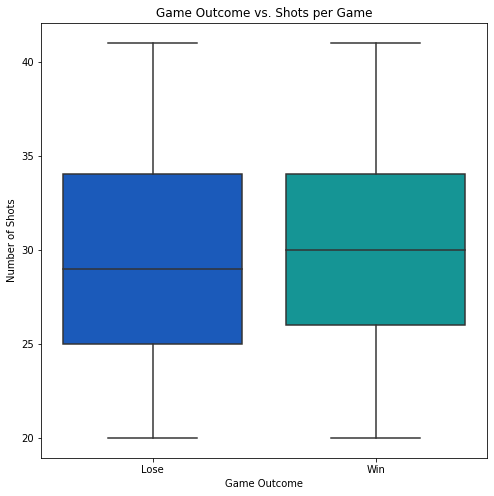

In [218]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot (1,1,1)
sns.boxplot(data=shots_game_df_filtered, x='won', y='shots', palette = 'winter')
plt.title('Game Outcome vs. Shots per Game')
plt.xlabel('Game Outcome')
plt.ylabel('Number of Shots')
ax1.set_xticklabels(['Lose', 'Win'])
plt.show()

**Larger number of shots per game increases the chances of a team to win a game.**

## C. General Stats <a class="anchor" id="general_stats"></a>

### 1. Is the larger number of penalty minutes good predictor for game loser? <a class="anchor" id="q4-1"></a>

To answer this question we use **game_teams_stats_df_cleaned**, and in particular won and pim column.

As regards pims only 8 values are missing which is doesn't effect our analysis. We can simply delete it.

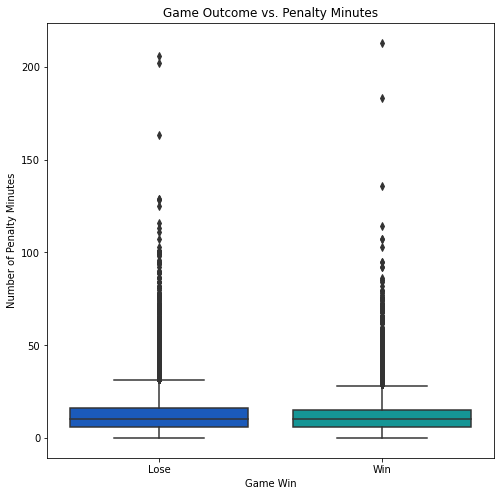

In [219]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot (1,1,1)
sns.boxplot(data=game_teams_stats_df_cleaned, x='won', y='pim', palette = 'winter')
plt.title('Game Outcome vs. Penalty Minutes')
plt.xlabel('Game Win')
plt.ylabel('Number of Penalty Minutes')
ax1.set_xticklabels(['Lose', 'Win'])
plt.show()

There are many outliers in the dataset, so it is difficult to interpret it. Lets remove them.

In [220]:
q_low = game_teams_stats_df_cleaned['pim'].quantile(0.05)
q_hi  = game_teams_stats_df_cleaned['pim'].quantile(0.95)
pim_df_filtered = game_teams_stats_df_cleaned[(game_teams_stats_df_cleaned['pim'] < q_hi) & (game_teams_stats_df_cleaned['pim'] > q_low)]

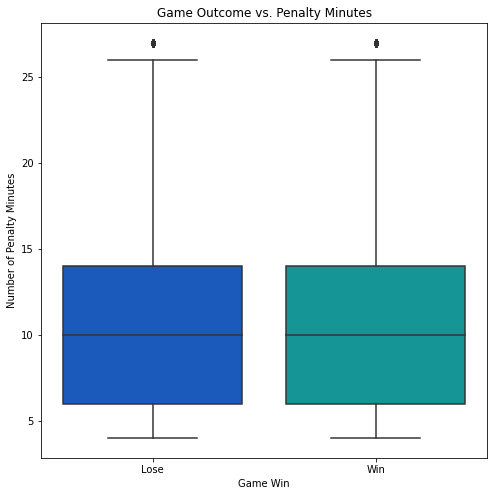

In [221]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot (1,1,1)
sns.boxplot(data=pim_df_filtered, x='won', y='pim', palette = 'winter')
plt.title('Game Outcome vs. Penalty Minutes')
plt.xlabel('Game Win')
plt.ylabel('Number of Penalty Minutes')
ax1.set_xticklabels(['Lose', 'Win'])
plt.show()

**Larger number of penalty minutes is not a good predictor for game loser.**

## D. Advanced <a class="anchor" id="advanced"></a>

### 1. Do the phisical abilities of players like average team age or average height and/or weight across all teams in different seasons affect the number of wins? <a class="anchor" id="q5-1"></a>

First of all let's create the dataset to work on. We need *'game_id', 'player_id', 'team_id_x'* columns from **skater_stats_df**,  *'birthDate', 'height_cm', 'weight'* from  **player_info_df**, *'season'* from **game_df** and *'won'* from **game_teams_stats_df_cleaned**. We do multiple merges of dataset strating from skater_stats_df as the primary data for every player performance.

In [222]:
# Create temp_df by merging skater_stats_df (game_id,player_id,team_id) and player_info_df (birthDate,height_cm,weight)
temp_df = skater_stats_df.merge(player_info_df, how='left', on='player_id')

In [223]:
# Merge temp_df with game_df to get the season column
temp_df = temp_df.merge(game_df, how='left', on='game_id')
temp_df = temp_df[['game_id', 'player_id', 'team_id', 'birthDate', 'height_cm', 'weight', 'season']]  
temp_df.head(10)

,game_id,player_id,team_id,birthDate,height_cm,weight,season
0,2016020045,8468513,4,1982-08-25 01:00:00,185.42,203.0,20162017
1,2016020045,8476906,4,1993-04-20 01:00:00,180.34,180.0,20162017
2,2016020045,8474668,4,1988-08-05 01:00:00,187.96,206.0,20162017
3,2016020045,8473512,4,1988-01-12 00:00:00,180.34,185.0,20162017
4,2016020045,8471762,4,1987-03-15 00:00:00,187.96,190.0,20162017
5,2016020045,8478439,4,1997-03-11 00:00:00,177.80,175.0,20162017
6,2016020045,8470159,4,1983-10-19 01:00:00,182.88,200.0,20162017
7,2016020045,8478500,4,1997-01-13 00:00:00,185.42,201.0,20162017
8,2016020045,8475430,4,1990-06-04 01:00:00,185.42,205.0,20162017
9,2016020045,8477930,4,1985-03-06 00:00:00,182.88,198.0,20162017


In [224]:
# Add column of player current age for every season
temp_df['season_mid'] = temp_df['season'].astype(str).str[-4:]
temp_df['season_mid'] = temp_df['season_mid'].astype(int)
temp_df['season_mid'] = pd.to_datetime(temp_df['season_mid'], format='%Y')
temp_df['birthDate'] = pd.to_datetime(temp_df['birthDate'], format='%Y-%m-%d')
temp_df['curr_player_age'] = round(((temp_df['season_mid'] - temp_df['birthDate']).dt.days)/365, 0)
temp_df.head(10)

,game_id,player_id,team_id,birthDate,height_cm,weight,season,season_mid,curr_player_age
0,2016020045,8468513,4,1982-08-25 01:00:00,185.42,203.0,20162017,2017-01-01,34.0
1,2016020045,8476906,4,1993-04-20 01:00:00,180.34,180.0,20162017,2017-01-01,24.0
2,2016020045,8474668,4,1988-08-05 01:00:00,187.96,206.0,20162017,2017-01-01,28.0
3,2016020045,8473512,4,1988-01-12 00:00:00,180.34,185.0,20162017,2017-01-01,29.0
4,2016020045,8471762,4,1987-03-15 00:00:00,187.96,190.0,20162017,2017-01-01,30.0
5,2016020045,8478439,4,1997-03-11 00:00:00,177.80,175.0,20162017,2017-01-01,20.0
6,2016020045,8470159,4,1983-10-19 01:00:00,182.88,200.0,20162017,2017-01-01,33.0
7,2016020045,8478500,4,1997-01-13 00:00:00,185.42,201.0,20162017,2017-01-01,20.0
8,2016020045,8475430,4,1990-06-04 01:00:00,185.42,205.0,20162017,2017-01-01,27.0
9,2016020045,8477930,4,1985-03-06 00:00:00,182.88,198.0,20162017,2017-01-01,32.0


In [225]:
# Merge temp_df with game_teams_stats_df_cleaned to get the won column
temp_df = temp_df.merge(game_teams_stats_df_cleaned, how='left', on=['game_id', 'team_id'])

In [226]:
# slice only columns of intereset
skaters_df = temp_df[['game_id', 'player_id', 'team_id', 'birthDate', 'height_cm', 'weight', 'season', 'won', 'curr_player_age']]  

In [227]:
# Resulting table
skaters_df.head()

,game_id,player_id,team_id,birthDate,height_cm,weight,season,won,curr_player_age
0,2016020045,8468513,4,1982-08-25 01:00:00,185.42,203.0,20162017,0.0,34.0
1,2016020045,8476906,4,1993-04-20 01:00:00,180.34,180.0,20162017,0.0,24.0
2,2016020045,8474668,4,1988-08-05 01:00:00,187.96,206.0,20162017,0.0,28.0
3,2016020045,8473512,4,1988-01-12 00:00:00,180.34,185.0,20162017,0.0,29.0
4,2016020045,8471762,4,1987-03-15 00:00:00,187.96,190.0,20162017,0.0,30.0


A table for average weight for every team across seasons

In [228]:
avg_weight = skaters_df.groupby(['team_id', 'season']).mean()['weight'].round(2).reset_index()
avg_weight.head(30)

,team_id,season,weight
0,1,20102011,207.94
1,1,20112012,207.63
2,1,20122013,202.16
3,1,20132014,202.69
4,1,20142015,200.52
5,1,20152016,195.19
6,1,20162017,200.28
7,1,20172018,198.60
8,1,20182019,197.82
9,1,20192020,195.04


A table for average height for every team across seasons

In [229]:
avg_height = skaters_df.groupby(['team_id', 'season']).mean()['height_cm'].round(2).reset_index()
avg_height.head(30)

,team_id,season,height_cm
0,1,20102011,188.15
1,1,20112012,186.56
2,1,20122013,185.21
3,1,20132014,185.70
4,1,20142015,184.75
5,1,20152016,182.79
6,1,20162017,184.98
7,1,20172018,184.87
8,1,20182019,184.81
9,1,20192020,184.40


A table for average age for every team across seasons

In [230]:
avg_age = skaters_df.groupby(['team_id', 'season']).mean()['curr_player_age'].round(2).reset_index()
avg_age.head(30)

,team_id,season,curr_player_age
0,1,20102011,29.92
1,1,20112012,29.10
2,1,20122013,29.80
3,1,20132014,30.54
4,1,20142015,30.88
5,1,20152016,28.00
6,1,20162017,27.62
7,1,20172018,26.61
8,1,20182019,27.43
9,1,20192020,27.34


Let's join all three table together

In [231]:
weight_and_height = avg_weight.merge(avg_height, on=['team_id', 'season'])
weight_height_age = weight_and_height.merge(avg_age, on=['team_id', 'season'])
weight_height_age

,team_id,season,weight,height_cm,curr_player_age
0,1,20102011,207.94,188.15,29.92
1,1,20112012,207.63,186.56,29.10
2,1,20122013,202.16,185.21,29.80
3,1,20132014,202.69,185.70,30.54
4,1,20142015,200.52,184.75,30.88
...,...,...,...,...,...
305,88,20182019,193.22,182.60,27.56
306,88,20192020,199.11,185.98,27.00
307,89,20182019,205.22,187.11,26.11
308,89,20192020,202.78,186.27,29.56


Then let's create a table of teams with their wins across different seasons

In [232]:
team_wins_season = game_teams_stats_df_cleaned.merge(game_df, on = 'game_id')
team_wins_season = team_wins_season[['game_id', 'team_id', 'won', 'season']]
team_wins_season = team_wins_season.groupby(['team_id', 'season']).sum()['won'].reset_index()
team_wins_season.head(20)

,team_id,season,won
0,1.0,20002001,48.0
1,1.0,20012002,41.0
2,1.0,20022003,46.0
3,1.0,20032004,43.0
4,1.0,20052006,46.0
5,1.0,20062007,49.0
6,1.0,20072008,46.0
7,1.0,20082009,51.0
8,1.0,20092010,48.0
9,1.0,20102011,38.0


But we need seasons only available in skaters data. So let's update our team_wins_season a little

In [233]:
seasons = list(avg_height.season.unique())
team_wins_season = team_wins_season[team_wins_season['season'].isin(seasons)]

Then we merge win dataset with height and weight table

In [234]:
team_data = team_wins_season.merge(weight_height_age, on=['team_id', 'season'])
team_data

,team_id,season,won,weight,height_cm,curr_player_age
0,1.0,20102011,38.0,207.94,188.15,29.92
1,1.0,20112012,62.0,207.63,186.56,29.10
2,1.0,20122013,19.0,202.16,185.21,29.80
3,1.0,20132014,35.0,202.69,185.70,30.54
4,1.0,20142015,32.0,200.52,184.75,30.88
...,...,...,...,...,...,...
305,88.0,20182019,2.0,193.22,182.60,27.56
306,88.0,20192020,0.0,199.11,185.98,27.00
307,89.0,20182019,0.0,205.22,187.11,26.11
308,89.0,20192020,0.0,202.78,186.27,29.56


Convert weight in pounds to kg

In [235]:
team_data['weight'] = round(team_data['weight']/ 2.20462, 2)

Finally we get team abbreaviations from team_info dataframe, select the required colums and assign them correct names

In [236]:
team_info_df = team_info_df[['team_id', 'abbreviation']]
team_data_final = team_data.merge (team_info_df, on='team_id')
team_data_final = team_data_final[['abbreviation', 'season', 'won', 'weight', 'height_cm', 'curr_player_age']]
team_data_final.columns = ['team', 'season', 'wins', 'avg_weight', 'avg_height', 'avg_age']
team_data_final.head(10)

,team,season,wins,avg_weight,avg_height,avg_age
0,NJD,20102011,38.0,94.32,188.15,29.92
1,NJD,20112012,62.0,94.18,186.56,29.10
2,NJD,20122013,19.0,91.70,185.21,29.80
3,NJD,20132014,35.0,91.94,185.70,30.54
4,NJD,20142015,32.0,90.95,184.75,30.88
5,NJD,20152016,38.0,88.54,182.79,28.00
6,NJD,20162017,28.0,90.85,184.98,27.62
7,NJD,20172018,45.0,90.08,184.87,26.61
8,NJD,20182019,31.0,89.73,184.81,27.43
9,NJD,20192020,28.0,88.47,184.40,27.34


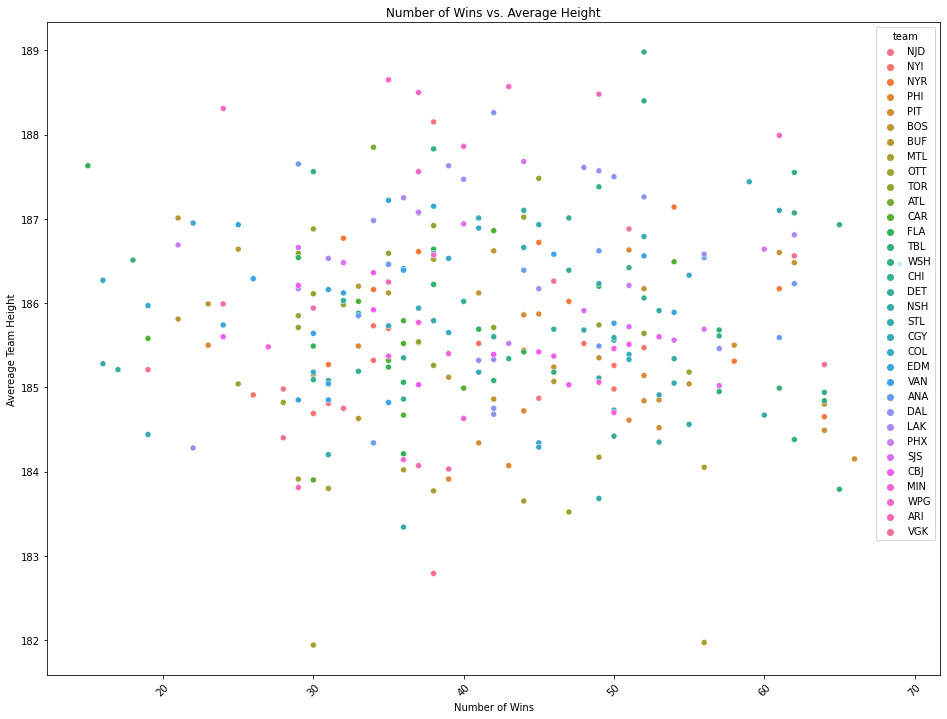

In [237]:
plt.figure(figsize=(16,12))
ax = plt.subplot (1,1,1)
sns.scatterplot(data=team_data_final, x="wins", y="avg_height", hue="team")
plt.title('Number of Wins vs. Average Height')
plt.xlabel('Number of Wins')
plt.xticks(rotation = 45)
plt.ylabel('Avereage Team Height')
plt.show()

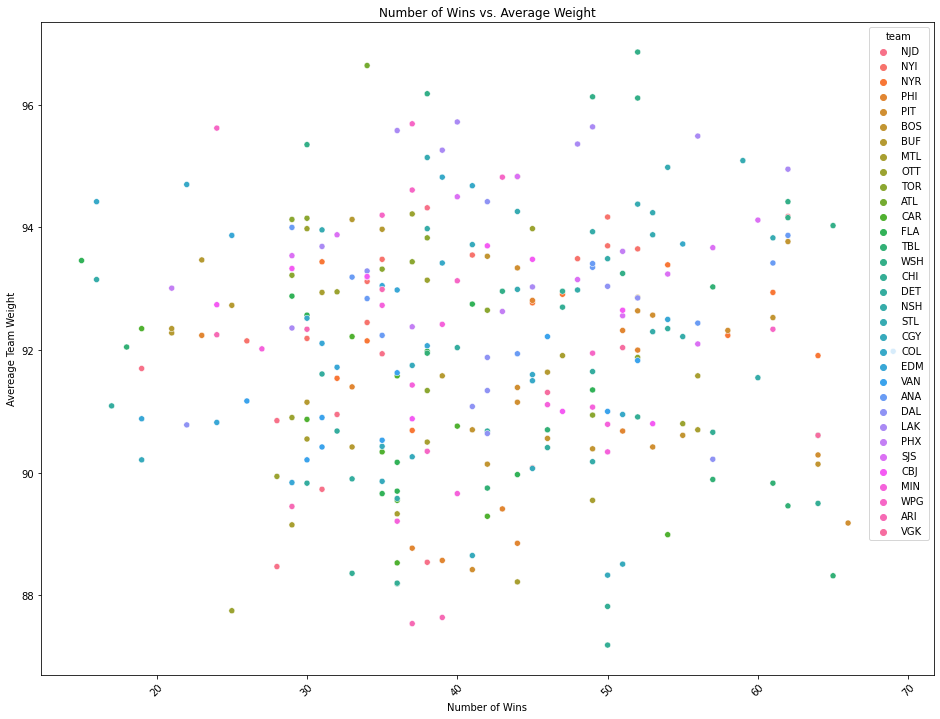

In [238]:
plt.figure(figsize=(16,12))
ax = plt.subplot (1,1,1)
sns.scatterplot(data=team_data_final, x="wins", y="avg_weight", hue="team")
plt.title('Number of Wins vs. Average Weight')
plt.xlabel('Number of Wins')
plt.xticks(rotation = 45)
plt.ylabel('Avereage Team Weight')
plt.show()

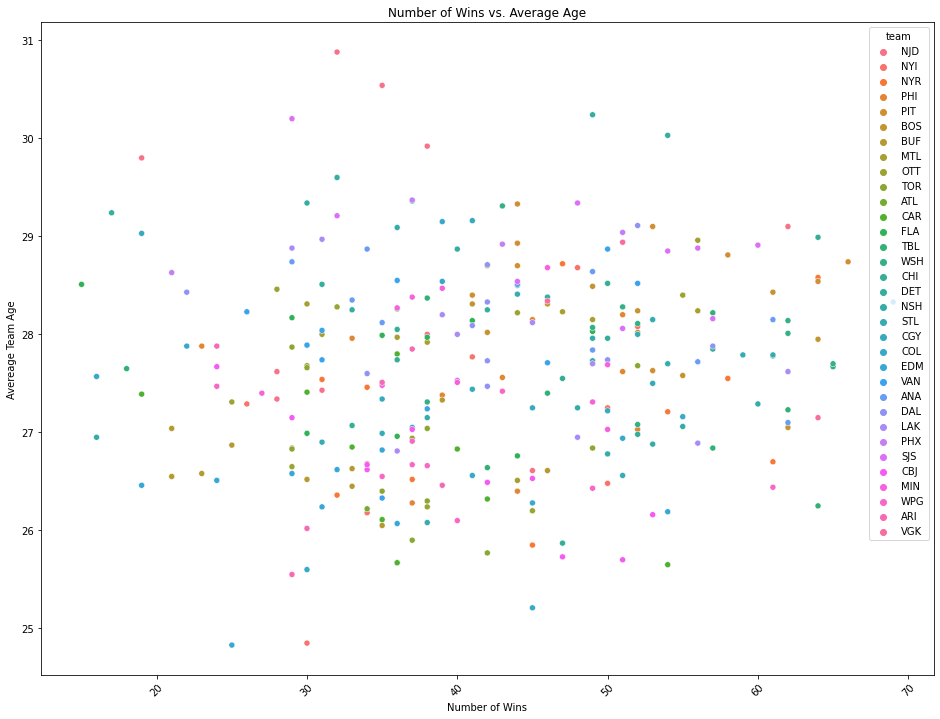

In [126]:
plt.figure(figsize=(16,12))
ax = plt.subplot (1,1,1)
sns.scatterplot(data=team_data_final, x="wins", y="avg_age", hue="team")
plt.title('Number of Wins vs. Average Age')
plt.xlabel('Number of Wins')
plt.xticks(rotation = 45)
plt.ylabel('Avereage Team Age')
plt.show()

**Scatter plots show no correlation of height, weight and age with the number of wins. There are no visible patterns here.**

# Additional Analysis <a class="anchor" id="add"></a>

This section will begin analyzing the data after the initial exploration. Let's join the points into meaningful segments i.e. performance levels. To do that let's get the summary statistic

In [239]:
team_data_final.describe()

,season,wins,avg_weight,avg_height,avg_age
count,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,2.014736e+07,41.735974,92.042079,185.777360,27.623267
std,2.885158e+04,11.435230,1.916592,1.129912,1.024780
min,2.010201e+07,15.000000,87.190000,181.940000,24.830000
25%,2.012201e+07,34.000000,90.680000,185.045000,26.860000
50%,2.015202e+07,41.000000,92.220000,185.690000,27.680000
75%,2.017202e+07,50.000000,93.430000,186.550000,28.310000
max,2.019202e+07,69.000000,96.860000,188.980000,30.880000


Let's add performance column with the following levels:\
**`Outstanding Performance`:** wins >= 50\
**`Good Performance`:** 41 <= wins < 50\
**`Mediocre Performance`:** 34 <= wins < 41\
**`Poor Performance`:** wins < 34

In [240]:
# create function and apply it to dataset:
def performance_calc (row):
    if row['wins'] >= 50:
        val = 'Outstanding Performance'
    elif (row['wins'] >= 41) and (row['wins'] < 50):
        val = 'Good Performance'
    elif (row['wins'] >= 34) and (row['wins'] < 41):
        val = 'Mediocre Performance'
    else: 
        val = 'Poor Performance'
    return val
team_data_final['performance'] = team_data_final.apply(performance_calc, axis=1)

In [241]:
team_data_final

,team,season,wins,avg_weight,avg_height,avg_age,performance
0,NJD,20102011,38.0,94.32,188.15,29.92,Mediocre Performance
1,NJD,20112012,62.0,94.18,186.56,29.10,Outstanding Performance
2,NJD,20122013,19.0,91.70,185.21,29.80,Poor Performance
3,NJD,20132014,35.0,91.94,185.70,30.54,Mediocre Performance
4,NJD,20142015,32.0,90.95,184.75,30.88,Poor Performance
...,...,...,...,...,...,...,...
298,ARI,20182019,39.0,87.64,184.03,26.46,Mediocre Performance
299,ARI,20192020,37.0,87.54,184.07,27.85,Mediocre Performance
300,VGK,20172018,64.0,90.61,185.27,27.15,Outstanding Performance
301,VGK,20182019,46.0,91.31,186.26,28.34,Good Performance


Let's look at the shape of our data, what is the distribution of average weight, height and age?

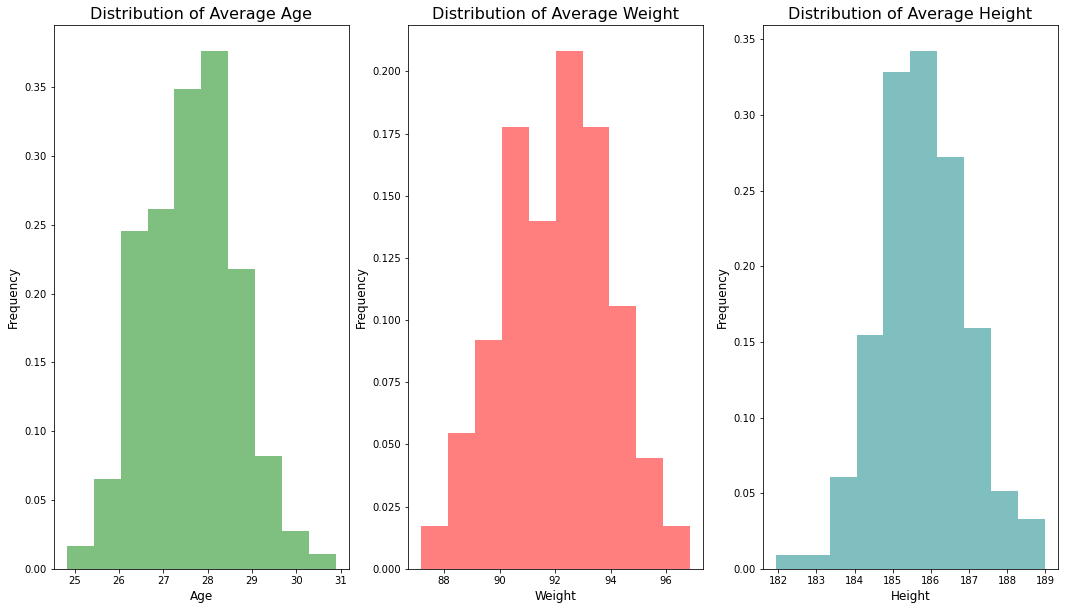

In [242]:
plt.figure(figsize=(18,10))
ax = plt.subplot (1,3,1)
plt.hist(team_data_final['avg_age'], color = 'green', label='Age', density=True, alpha=0.5)
plt.title('Distribution of Average Age', size=16)
plt.xlabel('Age', size=12)
plt.ylabel('Frequency', size=12)
ax = plt.subplot (1,3,2)
plt.hist(team_data_final['avg_weight'], color = 'red', label='Weight', density=True, alpha=0.5)
plt.title('Distribution of Average Weight', size=16)
plt.xlabel('Weight', size=12)
plt.ylabel('Frequency', size=12)
ax = plt.subplot (1,3,3)
plt.hist(team_data_final['avg_height'], color = 'teal', label='Height', density=True, alpha=0.5)
plt.title('Distribution of Average Height', size=16)
plt.xlabel('Height', size=12)
plt.ylabel('Frequency', size=12)
plt.show()

The prime years for hockey players lay between 26 and 29. Hockey players expectedly pretty big guys with the average weight of 88-96 kg and the height of 184 to 188 cm.

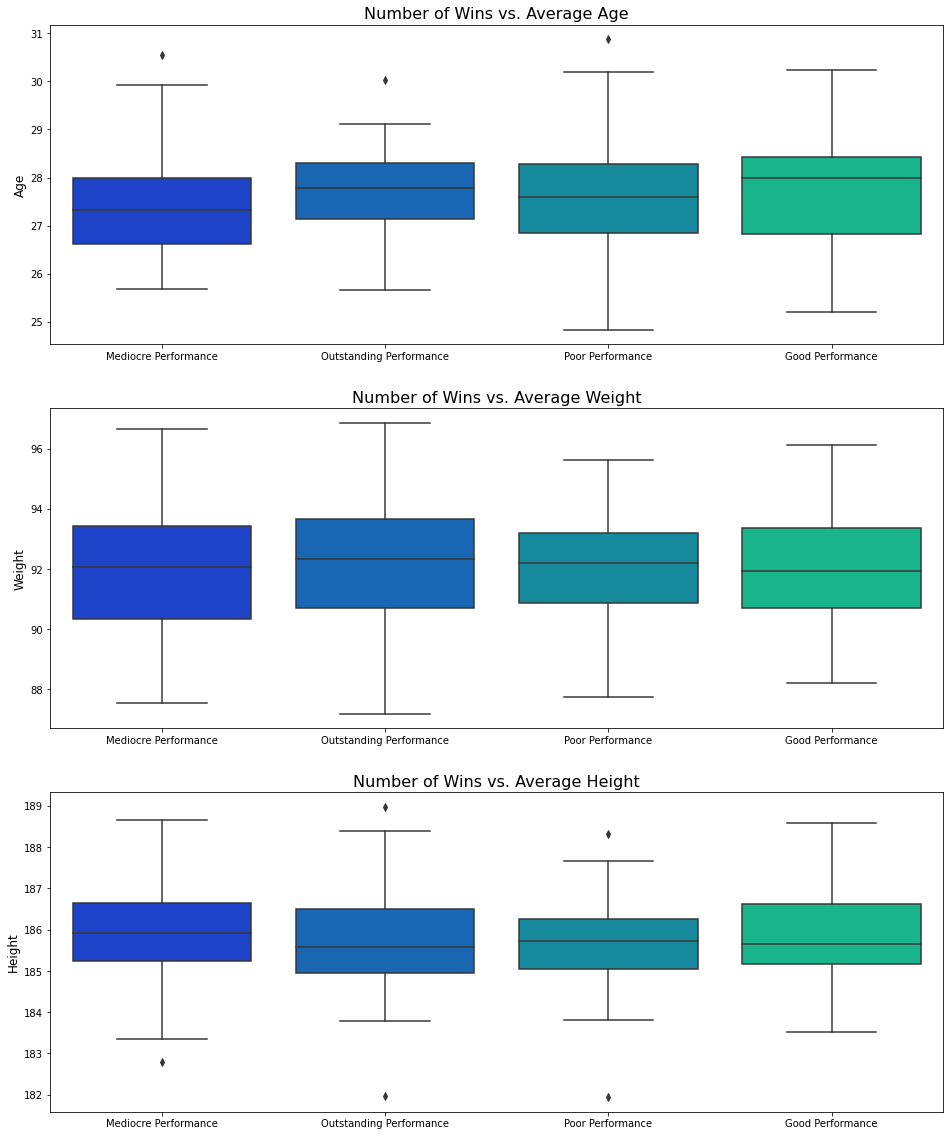

In [243]:
plt.figure(figsize=(16,20))
ax = plt.subplot (3,1,1)
sns.boxplot(data=team_data_final, x='performance', y='avg_age', palette = 'winter')
plt.title('Number of Wins vs. Average Age', size=16)
plt.xlabel('')
plt.ylabel('Age', size=12)
ax = plt.subplot (3,1,2)
sns.boxplot(data=team_data_final, x='performance', y='avg_weight', palette = 'winter')
plt.title('Number of Wins vs. Average Weight', size=16)
plt.xlabel('')
plt.ylabel('Weight', size=12)
ax = plt.subplot (3,1,3)
sns.boxplot(data=team_data_final, x='performance', y='avg_height', palette = 'winter')
plt.title('Number of Wins vs. Average Height', size=16)
plt.xlabel('')
plt.ylabel('Height', size=12)
plt.show()

Again we don't see significant difference in number of wins depending on height, weight or age.

# Conclusions <a class="anchor" id="conclusions2"></a>
The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

**General**
1. Has the average number of goals per game increased over time?
    - The average number of goals per game started to steadily increase since season 2016/2017.
1. Has the average number of shots per game(1) increased over time?
    - The average number of shots per game started to increase since season 2002/2003
1. What is the goalie save percentage dynamic?
    - The average goalie save percentage per season increased from 89.7 in 2000/2001 season to 90.1 in 2019/2020 which is pretty much for such statistic.

**Specific**
**A. Defensive Stats**
1. Is larger number of hits good predictor for game winner?
    - Larger number of hits is not a good predictor for game winner.
1. How does the goalie power play save percentage effect the game outcome?
    - Expectedly higher goalie power play save percentage increases the chances of a team to win a game.
1. How do blocks effect the game outcome?
    - Larger number of blocks per game increases the chances of a team to win a game.
1. How does takeaways and giveaways effect the game outcome?
    - Takeaways slightly increase the chances of a team to win a game whereas giveaways doesn't have any effect.

**B. Offensive Stats**
1. How does power play percentage effect the game outcome?
    - If a team doesn't convert power play opportunities to goals most likely a team loses.
1. Is larger number of shots per game good predictor for game winner?
    - Larger number of shots per game increases the chances of a team to win a game.
    
**C. General Stats**
1. Is the larger number of penalty minutes good predictor for game loser?
    - Larger number of penalty minutes is not a good predictor for game loser.
    
**D. Advanced**
1. Do physical abilities of players like average team age or average height effect the performance of a team?
    - There is no significant difference in number of wins depending on height, weight or age. The only conclusions we can make that the prime years for hockey players lay between 26 and 29. Hockey players expectedly pretty big guys with the average weight of 88-96 kg and the height of 184 to 188 cm.

# Further Research <a class="anchor" id="going_further"></a>

The datasets only included observations from 2000-2020 seasons and doesn't  give information abour recent times. It would be curious to find the reasons of positive dynamics of goalie save persentage and number of goals since the seasons of 2016/2017. Also some statistical analysis is required to deepen the ground of conclusions.